GoruntuIslemeHafta5

# Kütüphaneler

In [1]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Görüntülerle  ilgili işlemler

In [2]:
pip install opencv-python matplotlib

In [3]:
# Dosya seç ve yükle
uploaded = files.upload()

Saving meyveler.jpg to meyveler.jpg


In [27]:
# Yüklenen dosyayı/resmi açma
for file_name in uploaded.keys():
   imgOrj = Image.open("meyveler.jpg")

In [28]:
#görüntünün boyutu
imgOrj.size

(312, 161)

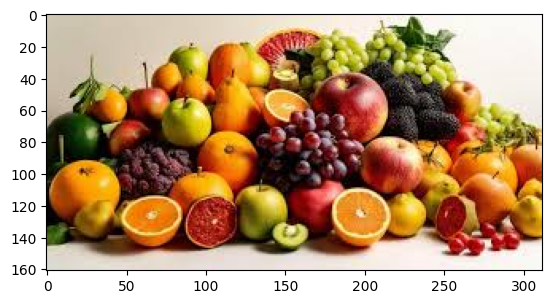

In [36]:
# Renkli Görüntüyü ekranda görüntüleme
plt.imshow(imgOrj)
plt.axis('on')  # Eksenleri aç/kapat
plt.show()

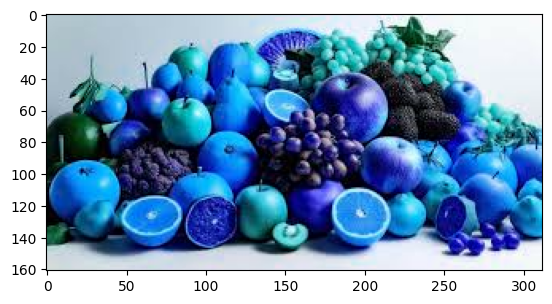

In [41]:
#bir görüntü okunur.
image = cv.imread('meyveler.jpg')  # Gri tonlamalı görüntüyü yükler.
#image = cv.imread('meyveler.jpg', cv.IMREAD_GRAYSCALE)

# Görüntüyü ekranda görüntüleme
plt.imshow(image)
#plt.imshow(imgOrj, cmap='gray')
plt.axis('on')  # Eksenleri aç/kapat
plt.show()

Bir görüntüyü 2 boyutlu evrişim matrisiyle bulanıklaştırma

In [42]:
# kernel oluştur (2 boyutlu convolution matris)
kernel1=np.ones((5,5), np.float32)/30

In [43]:
# 2 boyutlu filtre fonksiyonunu uygula
img=cv.filter2D(src=image, ddepth=-1, kernel=kernel1)

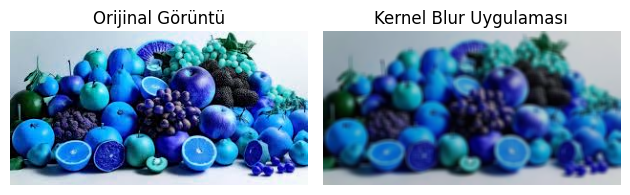

In [40]:
# Orijinal görüntüyü göster
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Blur uygulanmış görüntüyü göster
plt.subplot(1, 2, 2)
plt.title('Kernel Blur Uygulaması')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Görüntüleri göster
plt.tight_layout()
plt.show()

Yumuşatma (Ortalama Alma) Filtresi Maskesi

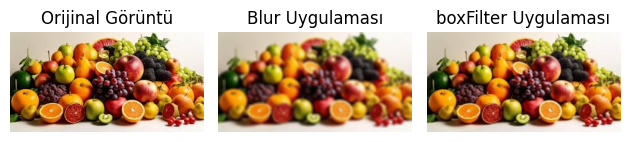

In [ ]:
'''
Renkli görüntülerle çalışmak için cv2.imread() fonksiyonunda görüntüyü renkli olarak yüklemeniz ve Matplotlib kullanarak doğru renk haritasında göstermeniz gerekiyor.
OpenCV, görüntüleri varsayılan olarak BGR (Blue-Green-Red) formatında yükler, ancak Matplotlib RGB (Red-Green-Blue) formatında çalışır.
Bu nedenle OpenCV'den yüklenen görüntüyü Matplotlib ile göstermek için önce BGR'den RGB'ye dönüştürmeniz gerekir.
'''
#görüntü okumak
image = cv.imread('meyveler.jpg')
#renkli görüntüyü RGB moduna dönüştürmek
imagee= cv.cvtColor(image, cv.COLOR_BGR2RGB)
#blur metodu. 5,5:kernel size (filtrenin boyutu)
im1=cv.blur(imagee,(5,5))
#boxFilter metodu
im2=cv.boxFilter(imagee, -1, (2,2), normalize=True)

'''
cv.boxFilter(imagee, -1, (2,2), normalize=True):
imagee: Giriş görüntüsü. Üzerinde filtreleme yapılacak görüntü.
-1: Çıktı görüntüsünün derinliğini belirtir. Eğer -1 verilirse, giriş görüntüsünün derinliği (yani kanal türü ve bit derinliği) korunur.
(2,2): Kullanılacak filtre boyutu (kernel). Bu durumda 2x2 boyutunda bir kutu filtre uygulanır.
Filtre bu 2x2 bölgenin piksellerinin ortalamasını alarak, ortalama değeri o bölgedeki tüm piksellere atar.
normalize=True: filtreleme sırasında piksel değerlerinin toplamı filtre boyutuna bölünerek normalize edilir (ortalama alınır).
Bu, değerlerin toplama göre normalize edildiği anlamına gelir ve genellikle keskinleştirme yerine yumuşatma için kullanılır.
'''

# Orijinal görüntüyü göster
plt.subplot(1, 3, 1)
plt.title('Orijinal Görüntü')
plt.imshow(imagee)
plt.axis('off')
# Blur uygulanmış görüntüyü göster
plt.subplot(1, 3, 2)
plt.title('Blur Uygulaması')
plt.imshow(im1)
plt.axis('off')
# boxFilter uygulanmış görüntüyü göster
plt.subplot(1, 3, 3)
plt.title('boxFilter Uygulaması')
plt.imshow(im2)
plt.axis('off')
# Görüntüleri göster
plt.tight_layout()
plt.show()

Sıra İstatistiği (Doğrusal Olmayan) Filtreler - Medyan Filtre

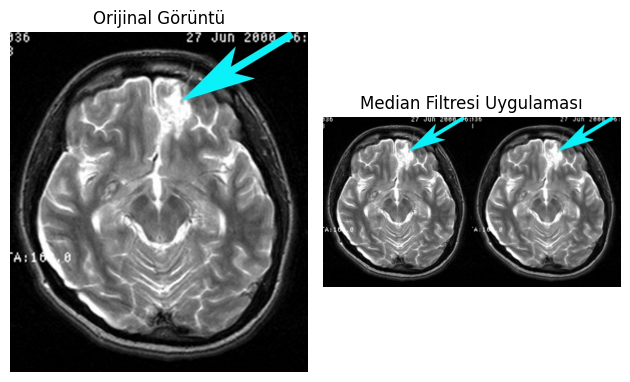

In [ ]:
#bir görüntü okunur.
imageSira = cv.imread('brain4.jpg')  # Gri tonlamalı görüntüyü yükler.
median=cv.medianBlur(imageSira,5)
compare=np.concatenate((imageSira,median),axis=1)
'''
#cv2.medianBlur(src, dst, ksize)
src - Bu işlem için kaynağı (girdi görüntüsü) temsil eden bir Mat nesnesi.
dst - Bu işlem için hedefi (çıktı görüntüsü) temsil eden bir Mat nesnesi.
ksize - Çekirdeğin boyutunu temsil eden bir Boyut nesnesi.
'''

# Orijinal görüntüyü göster
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(imageSira, cmap='gray')
plt.axis('off')

# Blur uygulanmış görüntüyü göster
plt.subplot(1, 2, 2)
plt.title('Median Filtresi Uygulaması')
plt.imshow(compare, cmap='gray')
plt.axis('off')

# Görüntüleri göster
plt.tight_layout()
plt.show()

Sıra İstatistiği (Doğrusal Olmayan) Filtreler - Medyan Filtre -Gürültü Ekleme

(-0.5, 279.5, 179.5, -0.5)

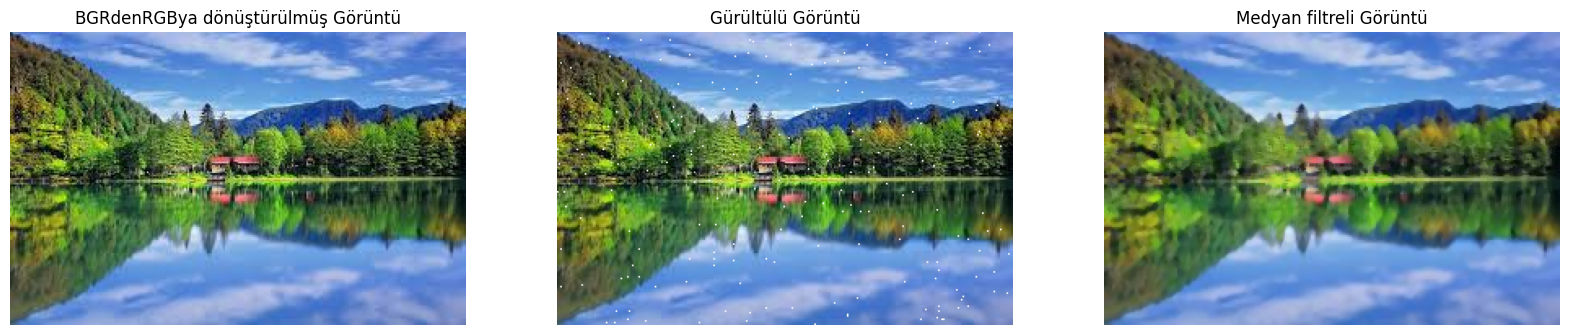

In [ ]:
import random

#görüntü okumak
image1 = cv.imread('manzara.jpg')
#renkli görüntüyü RGB moduna dönüştürmek
imageOrjinal= cv.cvtColor(image1, cv.COLOR_BGR2RGB)

#görüntü okumak
image1 = cv.imread('manzara.jpg')
#renkli görüntüyü RGB moduna dönüştürmek
img= cv.cvtColor(image1, cv.COLOR_BGR2RGB)

#Görüntüye 200 adet gürültü ekleyelim. bir görüntüye rastgele beyaz gürültü eklemek.
for k in range(0,200):
    i=random.randint(0, img.shape[0]-1)
    j=random.randint(0, img.shape[1]-1)
    img[i,j]=255

'''
for k in range(0, 200): Bu döngü, 0'dan 199'a kadar toplamda 200 kez çalışır. Her iterasyonda rastgele bir konum seçilir.
i = random.randint(0, img.shape[0] - 1):
  img.shape[0], görüntünün yüksekliğini (satır sayısını) döndürür.
  random.randint(0, img.shape[0] - 1) fonksiyonu, 0 ile görüntünün yüksekliği arasındaki rastgele bir tamsayı (satır indeksi) üretir.
  Bu, görüntüdeki rastgele bir satır konumunu belirler.
j = random.randint(0, img.shape[1] - 1):
  img.shape[1], görüntünün genişliğini (sütun sayısını) döndürür.
  random.randint(0, img.shape[1] - 1) fonksiyonu, 0 ile görüntünün genişliği arasındaki rastgele bir tamsayı (sütun indeksi) üretir.
  Bu, görüntüdeki rastgele bir sütun konumunu belirler.
img[i, j] = 255:
  Seçilen (i, j) konumundaki piksel değeri 255 olarak ayarlanır.
  Bu, genellikle beyaz bir pikseli temsil eder (gri tonlamalı bir görüntüde).
Sonuç olarak, bu işlem görüntüde 200 rastgele konuma beyaz gürültü ekler.
'''

filtre=cv.medianBlur(img,3)
'''
cv.medianBlur(img, 3):
img: Giriş görüntüsüdür. Üzerinde medyan bulanıklaştırma işlemi yapılacak olan görüntü.
3: Filtre boyutunu belirler. Bu durumda 3x3 boyutunda bir kare (kernel) kullanılır.
  Bu, her bir pikselin etrafındaki 3x3'lük alanı kapsayan bir filtreyi ifade eder.
'''

   # Görüntüleri yan yana göstermek için Matplotlib kullan
plt.figure(figsize=(20, 10))

    # imread ile okunan Orjinal görüntü
plt.subplot(1, 3, 1)
plt.title('BGRdenRGBya dönüştürülmüş Görüntü')
plt.imshow(imageOrjinal)
plt.axis('off')

    # gürültülü görüntü
plt.subplot(1, 3, 2)
plt.title('Gürültülü Görüntü')
plt.imshow(img)
plt.axis('off')

    # Parlaklık artırılmış görüntü
plt.subplot(1, 3, 3)
plt.title('Medyan filtreli Görüntü')
plt.imshow(filtre)
plt.axis('off')


Resmin parlaklığını değiştirmek

(-0.5, 311.5, 160.5, -0.5)

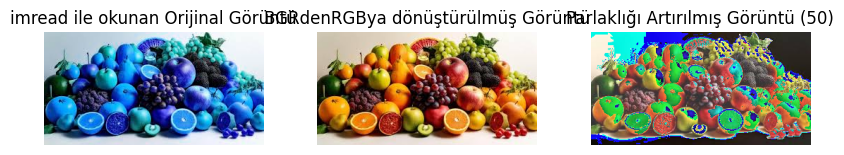

In [ ]:
image = cv.imread('meyveler.jpg')

#cv2.cvtColor(): OpenCV, görüntüleri BGR formatında yüklediği için, görüntüleri RGB formatına dönüştürürüz.
#Matplotlib, görüntüleri RGB formatında görüntüler.
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Parlaklık artırmak için her piksele 50 ekleyelim. Bir görüntünün parlaklığını 50 birim artırır.
    # NumPy'nin clip fonksiyonu ile değerlerin 0-255 arasında kalmasını sağlıyoruz (görüntüler 8-bit olduğu için bu aralık dışına çıkılmaz).
bright_image = np.clip(image + 50, 0, 255).astype(np.uint8)

    # Parlaklık artırılmış resmi de RGB'ye çevir
bright_image_rgb = cv.cvtColor(bright_image, cv.COLOR_BGR2RGB)

    # Görüntüleri yan yana göstermek için Matplotlib kullan
plt.figure(figsize=(10, 5))

    # imread ile okunan Orjinal görüntü
plt.subplot(1, 3, 1)
plt.title('imread ile okunan Orijinal Görüntü')
plt.imshow(image)
plt.axis('off')

    # BGRdenRGBya dönüştürülmüş görüntü
plt.subplot(1, 3, 2)
plt.title('BGRdenRGBya dönüştürülmüş Görüntü')
plt.imshow(image_rgb)
plt.axis('off')

    # Parlaklık artırılmış görüntü
plt.subplot(1, 3, 3)
plt.title('Parlaklığı Artırılmış Görüntü (50)')
plt.imshow(bright_image_rgb)
plt.axis('off')


Bir resme eşikleme (Thresholding) yapmak

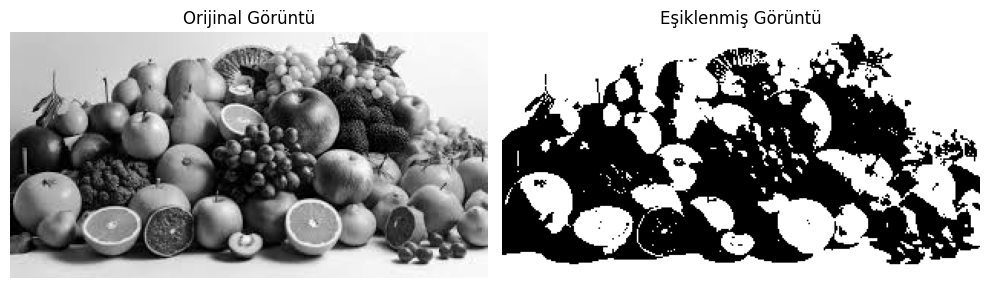

In [ ]:
# Bir görüntü yükle (gri tonlamalı olarak).
image = cv.imread('meyveler.jpg', cv.IMREAD_GRAYSCALE)

threshold_value = 127 # Basit bir eşik değeri belirleyelim (örneğin 127)
max_value = 255  # Eşik değeri üzerinde olan pikseller bu değere atanacak

    # Eşikleme işlemi uygula. Eşikleme fonksiyonu.
    #Bu fonksiyon, belirtilen eşik değerine göre (bu örnekte 127) görüntüyü ikili (binary) hale getirir.
    #Eğer bir piksel değeri 127'den küçükse 0, büyükse 255 olur.
    #Eşikleme türü cv.THRESH_BINARY ise eşik değeri altında kalan tüm pikseller 0'a (siyah), üstünde kalanlar 255'e (beyaz) dönüştürülür.
_, thresholded_image = cv.threshold(image, threshold_value, max_value, cv.THRESH_BINARY)

'''
Eşikleme Türleri:
cv2.THRESH_BINARY: Standart ikili eşikleme.
cv2.THRESH_BINARY_INV: Ters ikili eşikleme (eşik altında kalan pikseller 255, üstünde kalanlar 0 olur).
cv2.THRESH_TRUNC: Eşik üzerinde kalan pikseller eşik değerine set edilir, diğerleri olduğu gibi kalır.
cv2.THRESH_TOZERO: Eşik altında kalan pikseller sıfırlanır, diğerleri olduğu gibi kalır.
'''

    # Görüntüleri yan yana göstermek için Matplotlib kullan
plt.figure(figsize=(10, 5))

    # Orijinal gri tonlamalı görüntü
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image, cmap='gray')
plt.axis('off')

    # Eşiklenmiş görüntü
plt.subplot(1, 2, 2)
plt.title('Eşiklenmiş Görüntü')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Renkli resim üzerinde, histogram dengeleme olmadan kontrastı artırmak. Alpha ve beta değerleri ile oynayarak kontrastı ve parlaklığı ayarlayabilirsiniz.

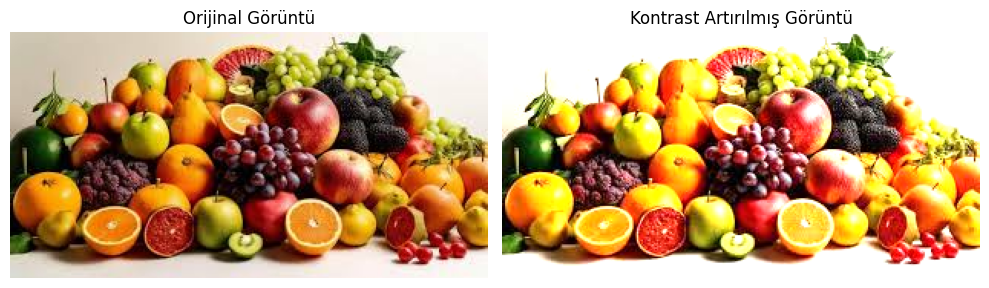

In [ ]:
image = cv.imread('meyveler.jpg')

#image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Kontrastı artırmak için doğrusal bir çarpan kullanacağız
alpha = 1.5  # Kontrast çarpanı. Görüntüdeki kontrastı artırmak için kullanılan katsayıdır.
#Bu katsayı 1'in üzerinde olduğunda, kontrast artırılır. Tipik olarak 1.0 ile 3.0 arasında değerler kullanılır.
beta = 0     # Parlaklık ekleme değeri. Tüm piksel değerlerine eklenen sabit bir değerdir.
#Bu kodda parlaklık artırılmıyor (beta = 0), ancak eklemek isterseniz beta'yı artırabilirsiniz.

    # Doğrusal kontrast artırma işlemi (alpha ile çarpma, beta ile toplama)
contrast_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
#cv2.convertScaleAbs(): Doğrusal kontrast germe işlemini uygular.
#Bu fonksiyon, her piksel değerine şu işlemi uygular: output_pixel = alpha * input_pixel + beta.
#Aynı zamanda değerleri 0-255 arasında sınırlar.

    # Orijinal resmi BGR'den RGB'ye çevir (Matplotlib ile doğru görüntülemek için)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
contrast_image_rgb = cv.cvtColor(contrast_image, cv.COLOR_BGR2RGB)

    # Görüntüleri yan yana göstermek için Matplotlib kullan
plt.figure(figsize=(10, 5))

    # Orijinal görüntü
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image_rgb)
plt.axis('off')

    # Kontrast artırılmış görüntü
plt.subplot(1, 2, 2)
plt.title('Kontrast Artırılmış Görüntü')
plt.imshow(contrast_image_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

İki boyutlu korelasyon ve konvolüsyon

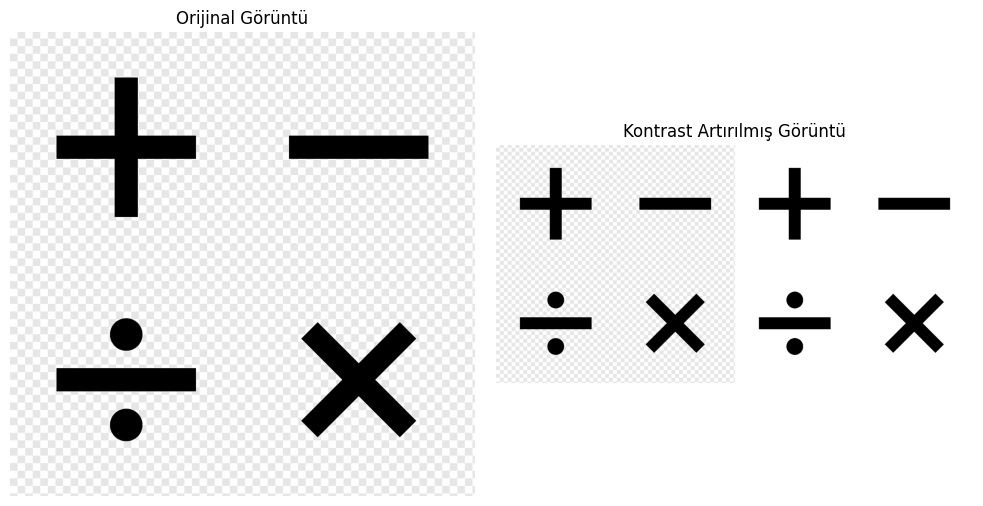

In [ ]:
image = cv.imread('dortislem.png')

np.array([[-1,2,-1],
          [-1,2,-1],
          [-1,2,-1]])
yatayFiltre=np.array([[-1,-1,-1],
                      [2,2,2],
                      [-1,-1,-1]])
dikeyFiltre=np.array([[-1,2,-1],
                      [-1,2,-1],
                      [-1,2,-1]])
diagFiltre=np.array([[-2,-1,-1],
                      [-1,2,-1],
                      [-1,-1,2]])
kernel2=np.array([[-1,-1,-1],
                  [1,8,-1],
                  [-1,-1,-1]])

filtre=cv.filter2D(src=image, ddepth=-1, kernel=yatayFiltre)
#filtre=cv.filter2D(src=image, ddepth=-1, kernel=dikeyFiltre)
#filtre=cv.filter2D(src=image, ddepth=-1, kernel=diagFiltre)
#filtre=cv.filter2D(src=image, ddepth=-1, kernel=kernel2)

 # Görüntüleri yan yana göstermek için Matplotlib kullan
plt.figure(figsize=(10, 5))

    # Orijinal görüntü
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image)
plt.axis('off')

    # Kontrast artırılmış görüntü
plt.subplot(1, 2, 2)
plt.title('Kontrast Artırılmış Görüntü')
plt.imshow(np.hstack((image,filtre)))
plt.axis('off')

plt.tight_layout()
plt.show()

Kenar Bulma Filtreleri

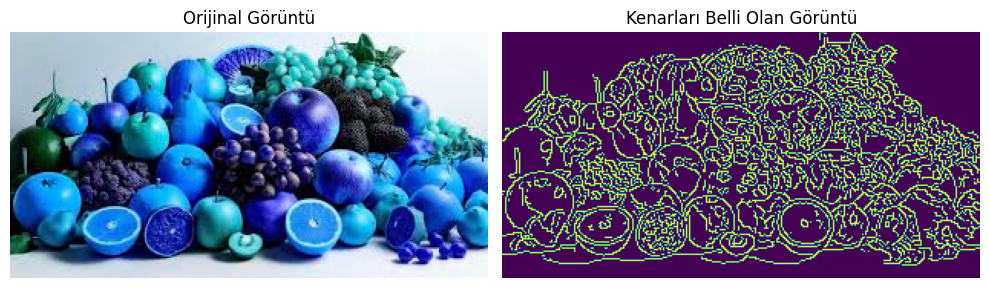

In [ ]:
img = cv.imread('meyveler.jpg')

t_lower=50
t_upper=150

edge=cv.Canny(img,t_lower,t_upper)

'''
cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)
Görüntü: Canny filtresinin uygulanacağı girdi görüntüsü
T_lower: Histerezis Eşiklemede alt eşik değeri
T_upper: Histerezis Eşiklemede üst eşik değeri
aperture_size: Sobel filtresinin açıklık boyutu.
L2Gradient: Kenar Gradyanı hesaplamasında daha fazla hassasiyet için kullanılan Boolean parametresi.
'''

# Görüntüleri yan yana göstermek için Matplotlib kullan
plt.figure(figsize=(10, 5))

    # Orijinal görüntü
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(img)
plt.axis('off')

    # Kenarları belli olan görüntü
plt.subplot(1, 2, 2)
plt.title('Kenarları Belli Olan Görüntü')
plt.imshow(edge)
plt.axis('off')

plt.tight_layout()
plt.show()